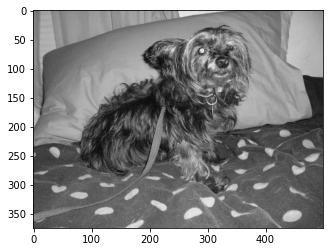

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

DATADIR = "D:/Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


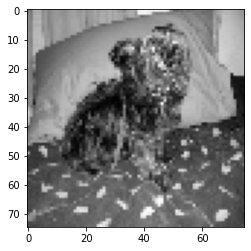

In [3]:
IMG_SIZE = 75
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [4]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):

            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

      

In [5]:
print(len(training_data))


24946


In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
0
1
1
0
0
0


In [8]:
X = []
y = []

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)


In [10]:
import pickle 

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [11]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)


In [12]:
X[1]

array([[[ 36],
        [ 49],
        [ 53],
        ...,
        [ 72],
        [ 80],
        [ 94]],

       [[ 59],
        [148],
        [161],
        ...,
        [180],
        [149],
        [112]],

       [[ 50],
        [161],
        [157],
        ...,
        [184],
        [166],
        [104]],

       ...,

       [[ 25],
        [ 57],
        [ 59],
        ...,
        [ 48],
        [ 53],
        [ 30]],

       [[ 20],
        [ 44],
        [ 44],
        ...,
        [ 42],
        [ 39],
        [ 27]],

       [[ 11],
        [ 12],
        [ 13],
        ...,
        [ 14],
        [ 16],
        [ 16]]], dtype=uint8)